<a href="https://colab.research.google.com/github/BitanGh/udemy/blob/main/Linear_Regression_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv('/content/Book2.csv')
df.head()

,Weight,Height
0,45,120
1,50,125
2,55,130
3,60,135
4,65,140


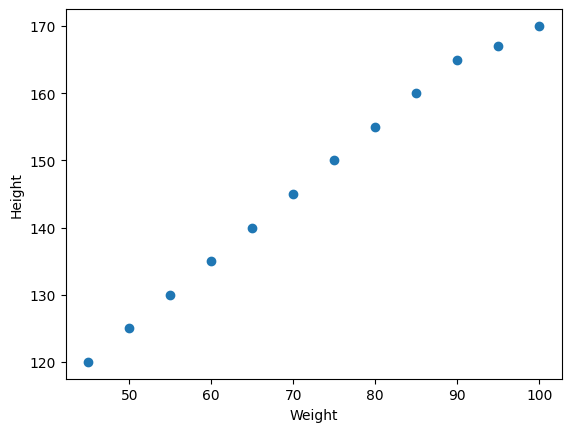

In [36]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Checking the correlation


In [37]:
df.corr() #linearly increasing

,Weight,Height
Weight,1.000000,0.997349
Height,0.997349,1.000000


In [ ]:
X = df[['Weight']]
Y = df['Height']

Train and Test Data split


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)



Standardization of the data


In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.44337567],
       [-0.8660254 ],
       [ 0.8660254 ],
       [-1.15470054],
       [ 0.57735027],
       [ 1.15470054],
       [-0.57735027],
       [-1.44337567],
       [ 0.        ]])

In [41]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.28867513],
       [ 1.73205081],
       [-0.28867513]])

Importing Linear Regression module

In [42]:
from sklearn.linear_model import LinearRegression


In [43]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [44]:
print("The value of Coefficient or Slope :",regression.coef_)
print("The value of Intercept :",regression.intercept_)

The value of Coefficient or Slope : [16.83938285]
The value of Intercept : 144.66666666666666


Plotting the best fit line for X_train

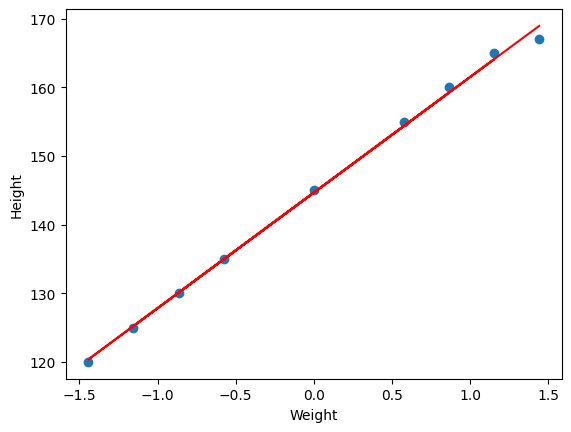

In [45]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

y_pred = 145.55 + 13.67(X_test)

In [46]:
Y_pred = regression.predict(X_test)
Y_pred

array([149.52777778, 173.83333333, 139.80555556])

Performance Matrice check with MSE,MAE values

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 4.985082304526704
Mean Absolute Error : 1.5
Root Mean Squared Error : 2.232729787620236


R_squared value

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print("R-squared value :",r2)

R-squared value : 0.9679530423280426


Finding by using OLS method

In [50]:
import statsmodels.api as sm

In [51]:
model = sm.OLS(Y_train,X_train).fit()

In [52]:
prediction = model.predict(X_test)
prediction

array([ 4.86111111, 29.16666667, -4.86111111])

In [53]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.110
Method:                 Least Squares   F-statistic:                             0.1084
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                       0.750
Time:                        08:09:40   Log-Likelihood:                         -57.540
No. Observations:                   9   AIC:                                      117.1
Df Residuals:                       8   BIC:                                      117.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


Predicting for new value

In [54]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([146.61111111])